In [96]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [97]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2012-1-1')['Adj Close']
data

,PG
Date,
2012-01-03,48.218842
2012-01-04,48.197205
2012-01-05,47.995148
2012-01-06,47.879723
2012-01-09,48.081741
...,...
2022-11-07,136.500000
2022-11-08,136.809998
2022-11-09,136.479996


In [98]:
log_return = np.log(data/data.shift(1))
log_return

,PG
Date,
2012-01-03,NaN
2012-01-04,-0.000449
2012-01-05,-0.004201
2012-01-06,-0.002408
2012-01-09,0.004210
...,...
2022-11-07,0.015207
2022-11-08,0.002268
2022-11-09,-0.002415


<AxesSubplot:xlabel='Date'>

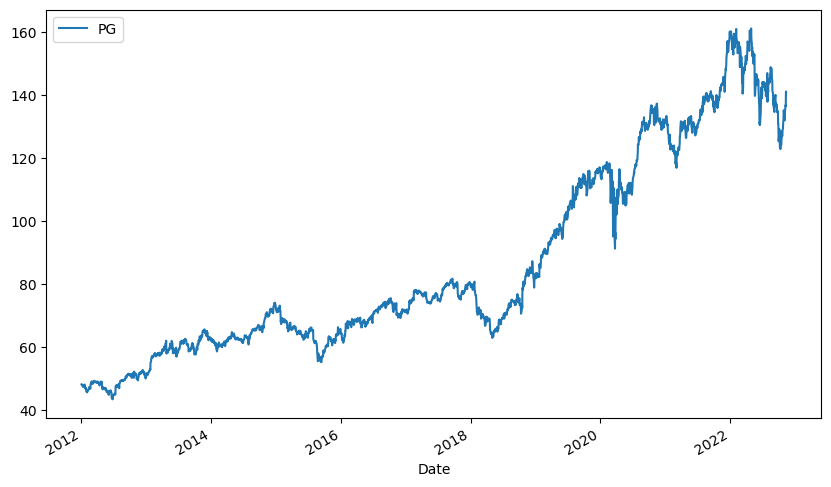

In [99]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

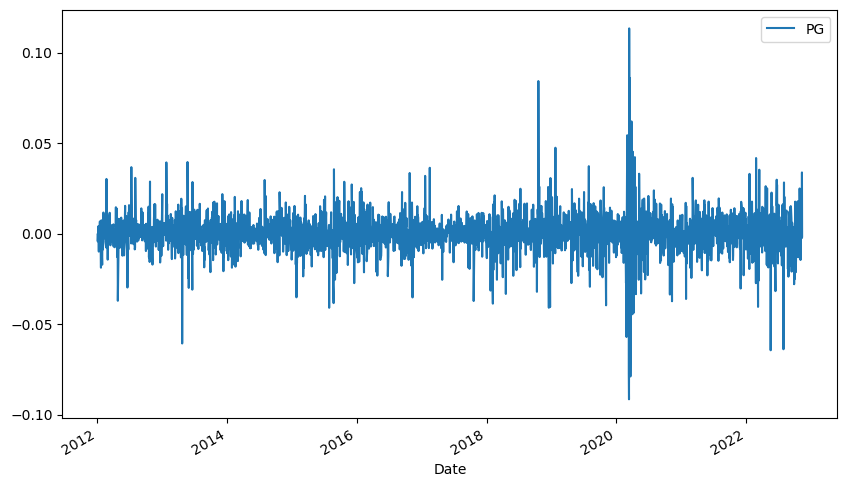

In [100]:
log_return.plot(figsize=(10,6))

In [101]:
 r_mean = log_return.mean()
r_mean

PG    0.000392
dtype: float64

In [102]:
r_var = log_return.var()
r_var

PG    0.000128
dtype: float64

In [103]:
drift = r_mean - 0.5*r_var
drift

PG    0.000328
dtype: float64

In [104]:
r_std = log_return.std()
r_std

PG    0.011314
dtype: float64

In [105]:
future_days = 1000
iterations = 10

In [106]:
daily_return = np.exp(drift.values + r_std.values * norm.ppf(np.random.rand(future_days,iterations)))
daily_return

array([[0.99340572, 0.99266253, 1.01337436, ..., 0.99860828, 0.99947582,
        1.00552839],
       [1.00389952, 1.01571704, 0.99915531, ..., 1.00791761, 0.98333015,
        0.96231099],
       [1.00965594, 1.00448865, 1.01149744, ..., 0.99881483, 0.98474785,
        0.99228397],
       ...,
       [1.00538328, 1.01257901, 0.97687257, ..., 0.99769769, 1.00261843,
        0.99819945],
       [0.98638495, 0.97532725, 0.99240776, ..., 1.02776585, 1.00794889,
        0.99777555],
       [0.98886463, 0.99077571, 0.98297722, ..., 1.00710978, 0.99914138,
        1.00333155]])

In [107]:
S0 = data.iloc[-1]
S0

PG    140.970001
Name: 2022-11-11 00:00:00, dtype: float64

In [108]:
# Create an array with the dimension of daily_return array

price_list = np.zeros_like(daily_return)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
price_list[0] = S0
price_list

array([[140.97000122, 140.97000122, 140.97000122, ..., 140.97000122,
        140.97000122, 140.97000122],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [110]:
for i in range(1,future_days):
    price_list[i] = price_list[i-1]*daily_return[i]

price_list

array([[140.97000122, 140.97000122, 140.97000122, ..., 140.97000122,
        140.97000122, 140.97000122],
       [141.5197164 , 143.18563199, 140.85092593, ..., 142.08614663,
        138.62005272, 135.65698116],
       [142.88622174, 143.82834256, 142.47035133, ..., 141.91775009,
        136.50579894, 134.61024736],
       ...,
       [294.17228207, 234.02052782, 101.26751566, ..., 264.08560986,
        148.70786668, 190.18065208],
       [290.16711185, 228.24659867, 100.49866847, ..., 271.41817016,
        149.88992931, 189.75760397],
       [286.93599378, 226.14118546,  98.78790146, ..., 273.34789359,
        149.76123007, 190.38979155]])

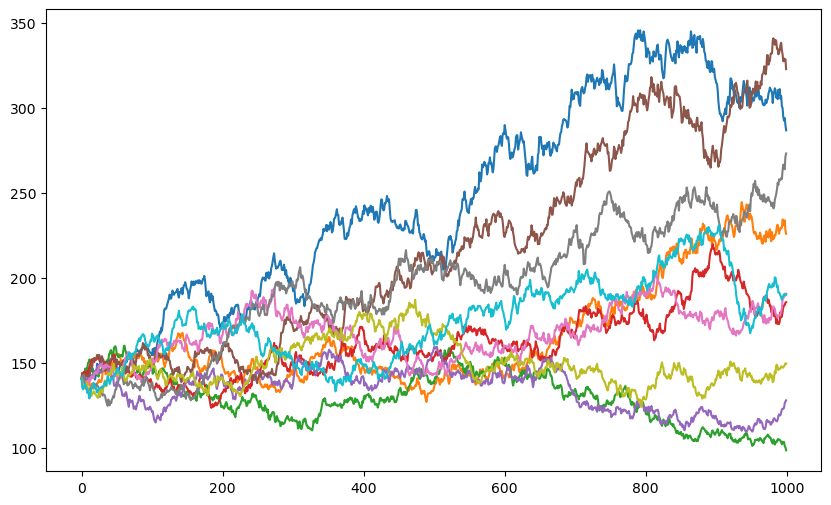

In [111]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()